### IDs:
Insert yours IDs to the cell below

ID #1:311149082

ID #2:000803254


### Read the following instructions carefully:



1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
from sklearn.datasets import load_boston
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)
from numpy.polynomial.polynomial import polyfit
from sklearn import mixture
import missingno as msno
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,5.0) # set default size of plots
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import multivariate_normal as mn

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

In [ ]:
# Generate the data
X = np.random.normal(loc=0, scale=0.01, size=50)
y = np.random.normal(loc=1000, scale=0.01, size=50)
X[49] = 1
y[49] = 1

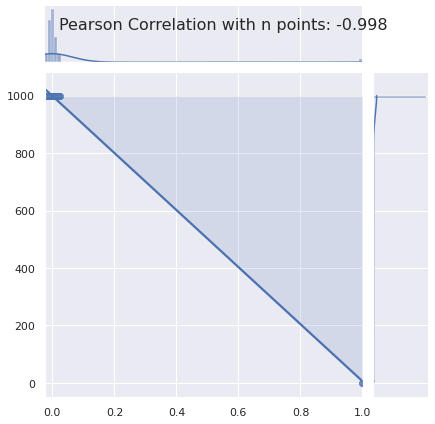

In [ ]:
sns.jointplot(x=X, y=y, kind="reg", marginal_kws=dict(bins=100))
plt.suptitle(f"Pearson Correlation with n points: {stats.pearsonr(X,y)[0]:.3f}", fontsize=16,x=0.5, y=0.95)
plt.show()

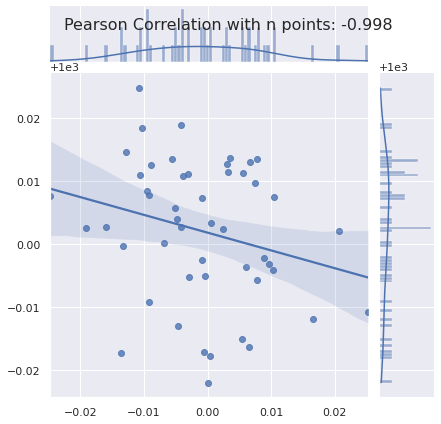

In [ ]:
sns.jointplot(x=X[:49], y=y[:49], kind="reg", marginal_kws=dict(bins=100))
plt.suptitle(f"Pearson Correlation with n points: {stats.pearsonr(X,y)[0]:.3f}", fontsize=16,x=0.5, y=0.95)
plt.show()

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

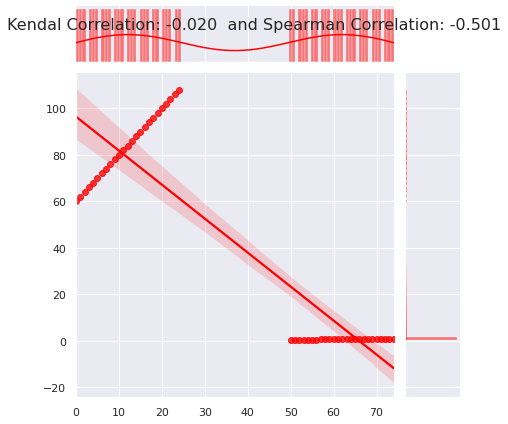

kendel > spearman + 0.45 is  True


In [ ]:
# Generate the data
x1 = np.arange(0,25) 
y1 = x1 * 2 +60
x2 = np.arange(50,75) 
y2 = x2 * 0.01
X = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

# Correlation
kendel = stats.kendalltau(X,y)[0]
spearman = stats.spearmanr(X,y)[0]

# Plot the data
sns.jointplot(x=X, y=y, kind="reg", marginal_kws=dict(bins=100), color="red")
plt.suptitle(f"Kendal Correlation: {kendel:.3f}  and Spearman Correlation: {spearman:.3f}",  fontsize=16,x=0.5, y=0.95)
plt.show()
print("kendel > spearman + 0.45 is ",kendel > spearman + 0.45 )


#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

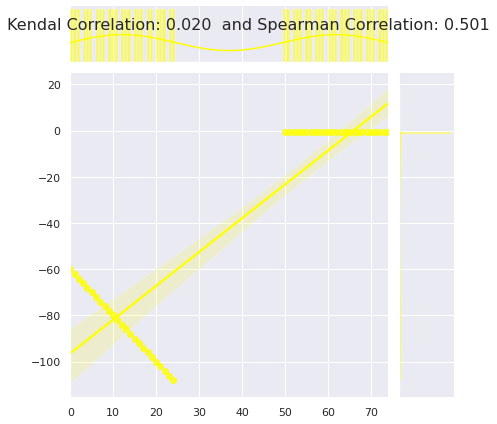

kendel < spearman - 0.45 is  True


In [ ]:
# Generate the data
x1 = np.arange(0,25) 
y1 = x1 * -2 -60
x2 = np.arange(50,75) 
y2 = x2 * -0.01
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

# Get correlation
kendel = stats.kendalltau(x,y)[0]
spearman = stats.spearmanr(x,y)[0]

# Plot the data
sns.jointplot(x=X, y=y, kind="reg", marginal_kws=dict(bins=100), color="yellow")
plt.suptitle(f"Kendal Correlation: {kendel:.3f}  and Spearman Correlation: {spearman:.3f}",  fontsize=16,x=0.5, y=0.95)
plt.show()
print("kendel < spearman - 0.45 is ",kendel < spearman - 0.45 )


#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

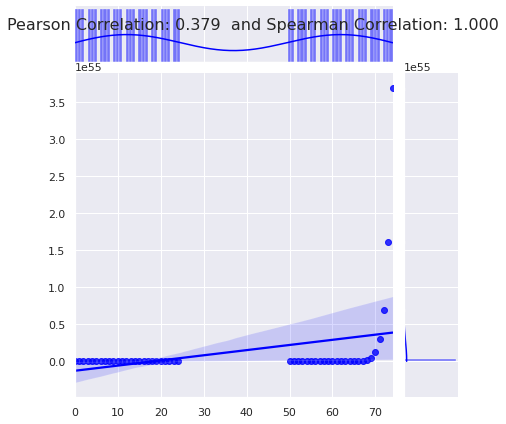

pearson < spearman - 0.6 is  True


In [ ]:
# Generate the data
x = np.arange(0,50) 
y = (x*0.5)**40

# Get correlation
pearson = stats.pearsonr(x,y)[0]
spearman = stats.spearmanr(x,y)[0]

# Plot the data
sns.jointplot(x=X, y=y, kind="reg", marginal_kws=dict(bins=100), color="blue")
plt.suptitle(f"Pearson Correlation: {pearson:.3f}  and Spearman Correlation: {spearman:.3f}", fontsize=16,x=0.5, y=0.95)
plt.show()
print("pearson < spearman - 0.6 is ",pearson < spearman - 0.6 )


#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

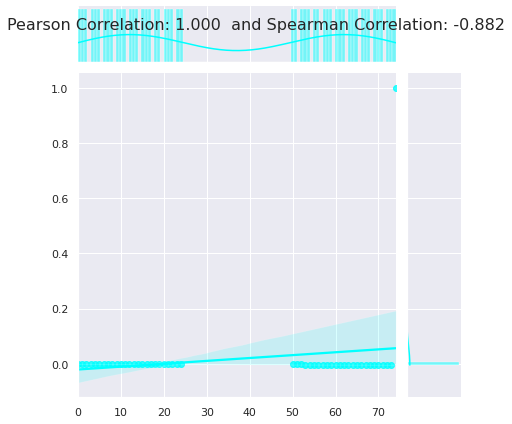

pearson > spearman + 1.2 is  True


In [ ]:
# Generate the data
x = np.arange(0,50) * 0.0001
y = (x * -1)
x[49] = 1
y[49] = 1
# Get correlation
pearson = stats.pearsonr(x,y)[0]
spearman = stats.spearmanr(x,y)[0]

# Plot the data
sns.jointplot(x=X, y=y, kind="reg", marginal_kws=dict(bins=100), color="cyan")
plt.suptitle(f"Pearson Correlation: {pearson:.3f}  and Spearman Correlation: {spearman:.3f}", fontsize=16,x=0.5, y=0.95)
plt.show()
print("pearson > spearman + 1.2 is ",pearson > spearman +1.2 )


#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

#### NO SOLUTION EXISTS:

This is not possible. Both Spearman and Kendall are ranked based correlations. Therefore, supoose towards a contradiction that the statement is true. Hence, there is τ(x,y) < ρ(x,y) – 1.2 and we have that τ(x,y) < 0 whilst ρ(x,y) > 0. This is not consistent with their definiton of ranking techniques as they both measure the monotonifity of X,y. Contradiction! 

Thus, it is impossible for τ(x,y) and ρ(x,y) to be so drastically different.


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

In [ ]:
def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    fig.suptitle(f"Bivariate Distribution means: {means[0]} and {means[1]}, and Covariance Matrix: {cov}")
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


#### Data visualization and Feature Information:

In [ ]:
heart_df = pd.read_csv('heart.csv',sep="\t")

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

#### There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature:

In [ ]:
heart_df.isnull().sum()

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

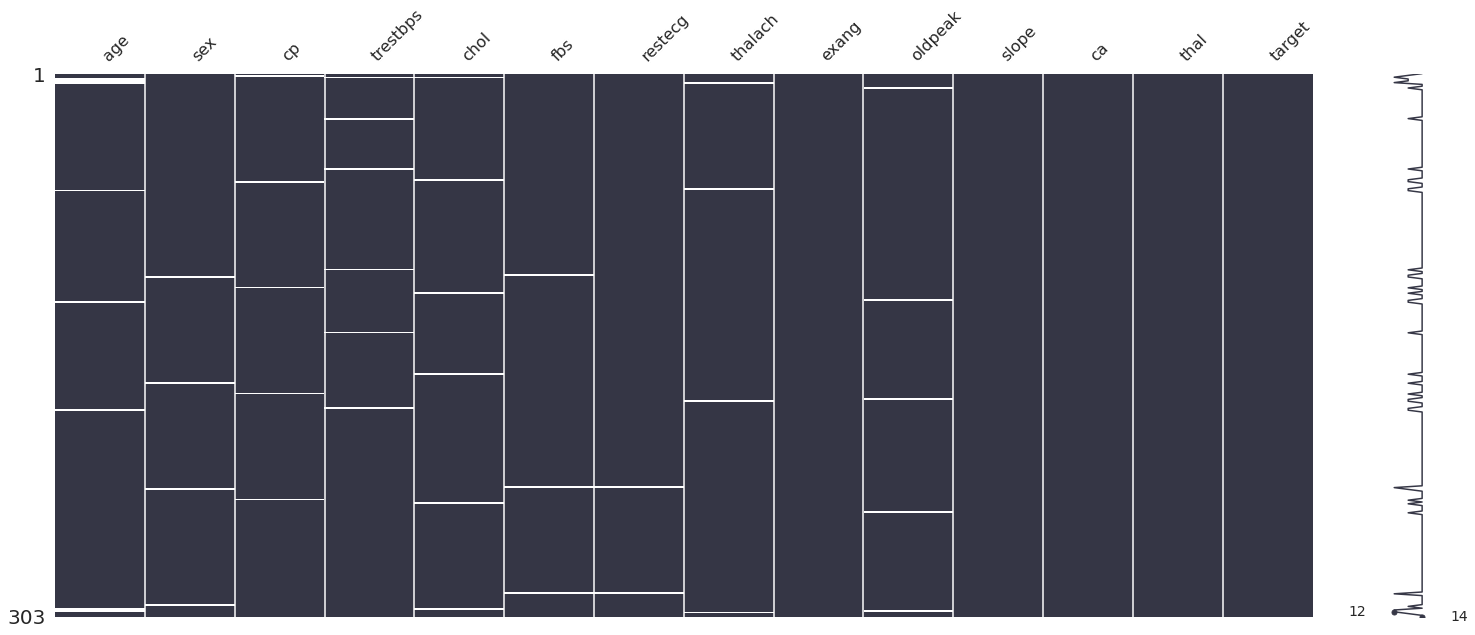

In [ ]:
# Visualizing the missing values per feature
msno.matrix(heart_df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target" ]], color = (0.211, 0.215, 0.274))
plt.show()

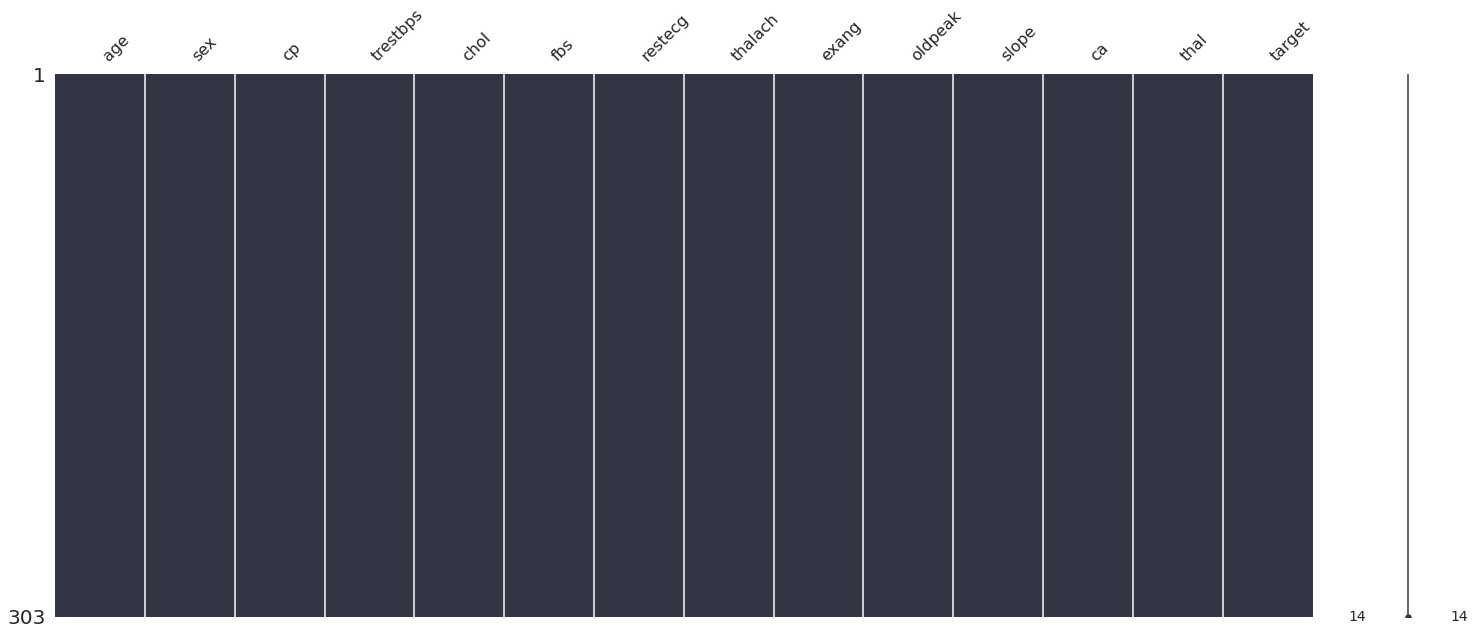

In [ ]:
categorical_cols = ["sex", "cp", "restecg","exang","slope", "fbs", "ca", "target" ,  "thal"]
non_categorical_cols = ["age", "trestbps", "chol",  "thalach", "oldpeak" ]
# For the categorical data we use the mode
for column in categorical_cols:
    heart_df[column].fillna(heart_df[column].mode()[0], inplace=True)
# For the non-categorical data we use the median
for column in non_categorical_cols:
    heart_df[column].fillna(heart_df[column].median(), inplace=True)

msno.matrix(heart_df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target" ]], color = (0.211, 0.215, 0.274))
plt.show()


#### Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.


 


In [ ]:
z_critical = stats.norm.ppf(1-0.05/2)
diseased = heart_df[heart_df.target == 1]
healthy = heart_df[heart_df.target == 0]
n = len(heart_df["age"])
# We iterate through each non categorical data
for feature in non_categorical_cols:
    # Get the mean and variance for healthy
    healthy_mean = healthy[feature].mean()
    healthy_var = (healthy[feature]).var()
    # Get the mean and variance for disease
    diseased_mean = diseased[feature].mean()
    diseased_var = diseased[feature].var()
    # Calc the standard error
    SE = np.sqrt((healthy_var / len(healthy)) + (diseased_var / len(diseased)))
    mean_diff = healthy_mean - diseased_mean
    #confidence interval on the difference
    conf_interval = (mean_diff - z_critical * SE, mean_diff + z_critical * SE)
    # Print results
    print(f"Feature: {feature}")
    print(f"The Healthy mean is: {healthy_mean:.2f} \nThe Diseased mean is: {diseased_mean:.2f}")
    print(f"95% Confidence Interval: {conf_interval}" '\n')

Feature: age
The Healthy mean is: 56.67 
The Diseased mean is: 52.52
95% Confidence Interval: (2.20610174258312, 6.096928560447177)

Feature: trestbps
The Healthy mean is: 134.40 
The Diseased mean is: 129.32
95% Confidence Interval: (1.1355575846807615, 9.031240834291587)

Feature: chol
The Healthy mean is: 250.57 
The Diseased mean is: 241.90
95% Confidence Interval: (-2.892532620825957, 20.243520763118422)

Feature: thalach
The Healthy mean is: 139.07 
The Diseased mean is: 158.42
95% Confidence Interval: (-24.11190418153853, -14.591653130714466)

Feature: oldpeak
The Healthy mean is: 1.57 
The Diseased mean is: 0.59
95% Confidence Interval: (0.7347501801873136, 1.2305462625004346)



#### Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

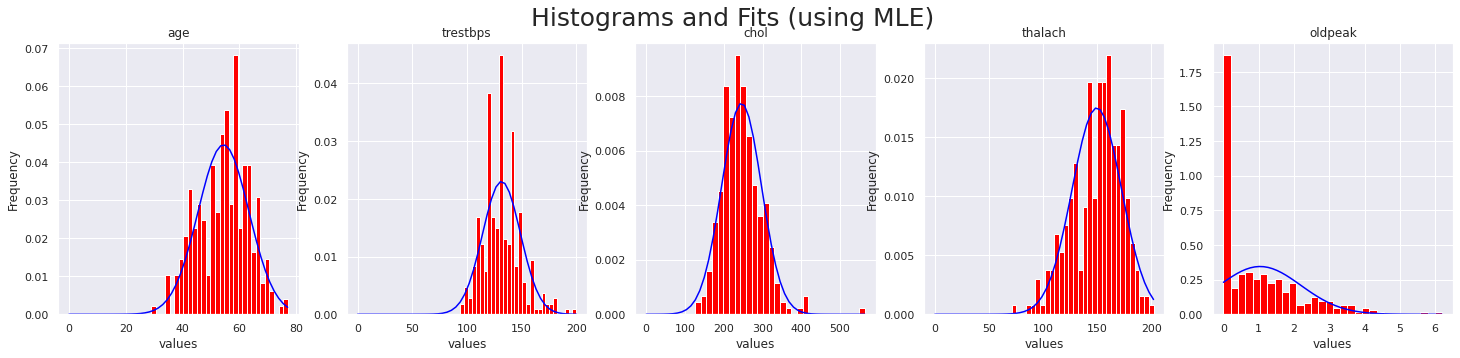

In [ ]:
import scipy
bins = 30
fig, axes = plt.subplots(1,5, figsize=(25,5))

fig.suptitle("Histograms and Fits (using MLE)", fontsize=25)
feature_index = 0
df = heart_df[non_categorical_cols]
for j in range(5):
    #max is used to get the correct range
    x = np.linspace(0,df[non_categorical_cols[feature_index]].max())
    #MLE-Run to find dist-params
    values = scipy.stats.norm.fit(df[non_categorical_cols[feature_index]])
    #create function to plot
    y = scipy.stats.norm(loc= values[0], scale=values[1]).pdf(x)
    axes[j].plot(x,y, color="blue")
    axes[j].hist(df[non_categorical_cols[feature_index]], bins = bins, density=True, color="red")
    axes[j].set_title(non_categorical_cols[feature_index])
    axes[j].set_xlabel("values")
    axes[j].set_ylabel("Frequency")
    feature_index = feature_index + 1

#### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. 

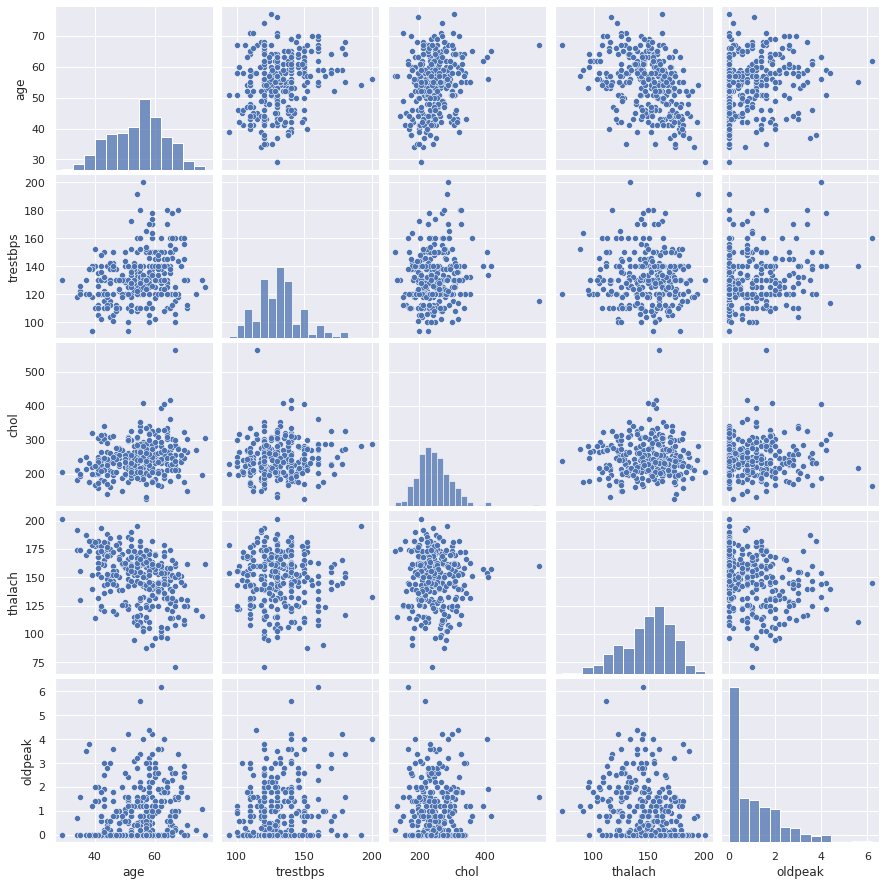

In [ ]:
# Visualize the noncategorical data
sns.pairplot(heart_df[non_categorical_cols]);

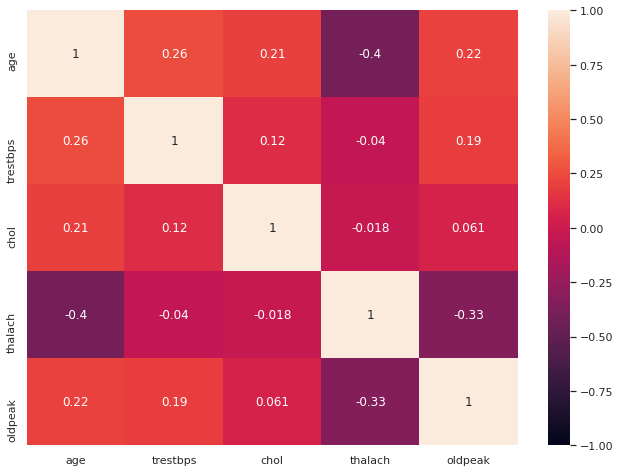

In [ ]:
#find correlation and plot the heatmap
corr = heart_df[non_categorical_cols].corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

In [ ]:
#find maximum corr
upper_diag = np.abs(np.triu(corr, k=1))
#find the maximum values index for each row.
max_index_list = np.argmax(upper_diag, axis=1)
#create nparray that holds the values index and the value itself
max_triple_array = np.array(list(zip(np.arange(len(max_index_list)), max_index_list, upper_diag[np.arange(5), max_index_list])))
#sorts them from smallest to biggest
max_triple_array_sorted = max_triple_array[max_triple_array[:,2].argsort()]
print("Table of sorted Pair Wise correlations")
print(max_triple_array_sorted)

Table of sorted Pair Wise correlations
[[4.         0.         0.        ]
 [2.         4.         0.06066057]
 [1.         4.         0.19422013]
 [3.         4.         0.3300604 ]
 [0.         3.         0.40167124]]


In [ ]:
#find significance (P-values)
features_correlations = []
for pair in max_triple_array_sorted:
    # Calc pearson corr
    corr1, p1 = scipy.stats.pearsonr(df[non_categorical_cols[int(pair[0])]], df[non_categorical_cols[int(pair[1])]])
    # Calc spearman corr
    corr2, p2 = scipy.stats.spearmanr(df[non_categorical_cols[int(pair[0])]], df[non_categorical_cols[int(pair[1])]])
    # Calc Kendal corr
    corr3, p3 = scipy.stats.kendalltau(df[non_categorical_cols[int(pair[0])]], df[non_categorical_cols[int(pair[1])]])
    features_correlations.append([non_categorical_cols[int(pair[0])],non_categorical_cols[int(pair[1])],pair[2],float(p1),float(p2),float(p3)])
features_correlations = np.array(features_correlations)

#DF containing everything we just collected
total_df = pd.DataFrame({'Feature 1': features_correlations[:, 0], 
                         'Feature 2': features_correlations[:, 1], 
                         'Corr': features_correlations[:,2], 
                         'Pearson P-val': features_correlations[:,3].astype('float'), 
                         'Spearman P-val': features_correlations[:,4].astype('float'), 
                         'Kendall P-val': features_correlations[:,5].astype('float')})
total_df

,Feature 1,Feature 2,Corr,Pearson P-val,Spearman P-val,Kendall P-val
0,oldpeak,age,0.0,1.262282e-04,5.676403e-07,6.016990e-07
1,chol,oldpeak,0.060660570504369835,2.925622e-01,3.282475e-01,2.852039e-01
2,trestbps,oldpeak,0.19422012521807222,6.757819e-04,9.052777e-03,1.034484e-02
3,thalach,oldpeak,0.3300603965840759,3.923579e-09,2.636154e-14,3.321841e-13
4,age,thalach,0.4016712445609854,3.556044e-13,2.535268e-13,5.579111e-13


#### For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) 

In [ ]:
# #get rid of high p-values (above 0.000005 threshold)
df_pval = total_df[total_df["Pearson P-val"] <= 0.000005]
df_pval

,Feature 1,Feature 2,Corr,Pearson P-val,Spearman P-val,Kendall P-val
3,thalach,oldpeak,0.3300603965840759,3.923579e-09,2.636154e-14,3.321841e-13
4,age,thalach,0.4016712445609854,3.556044e-13,2.535268e-13,5.579111e-13


We see that there are only 2 significantly correlated feature pairs.
This is evident as the other pairs have less then where their absolute values are smaller then 0.5 and based on small enough p-values calculated above.

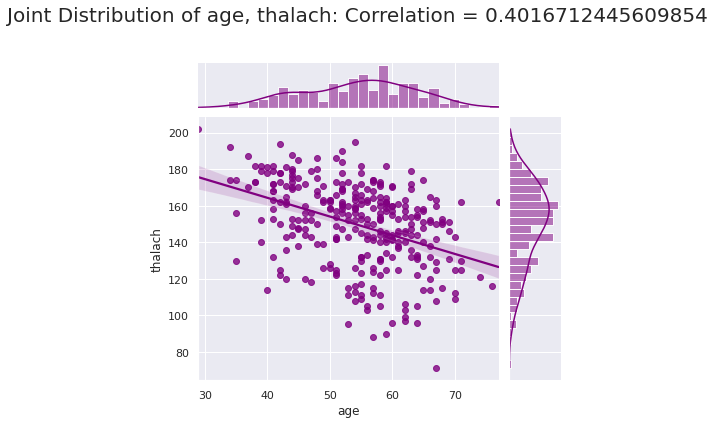

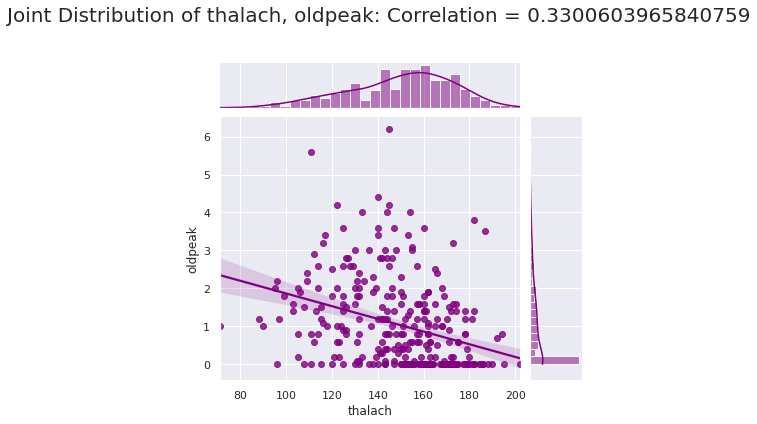

In [ ]:
#top 2 most correlated pairs
index = -1
#set how many relevant feature pairs one has.
significant = 2

for i in range(significant):
    triple = max_triple_array_sorted[index]
    sns.jointplot(x=non_categorical_cols[int(triple[0])], y=non_categorical_cols[int(triple[1])], data=df, marginal_kws=dict(bins=30), kind="reg", color="purple")
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Joint Distribution of {non_categorical_cols[int(triple[0])]}, {non_categorical_cols[int(triple[1])]}: Correlation = {triple[2]}', fontsize=20);
    index = index - 1


#### Find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).


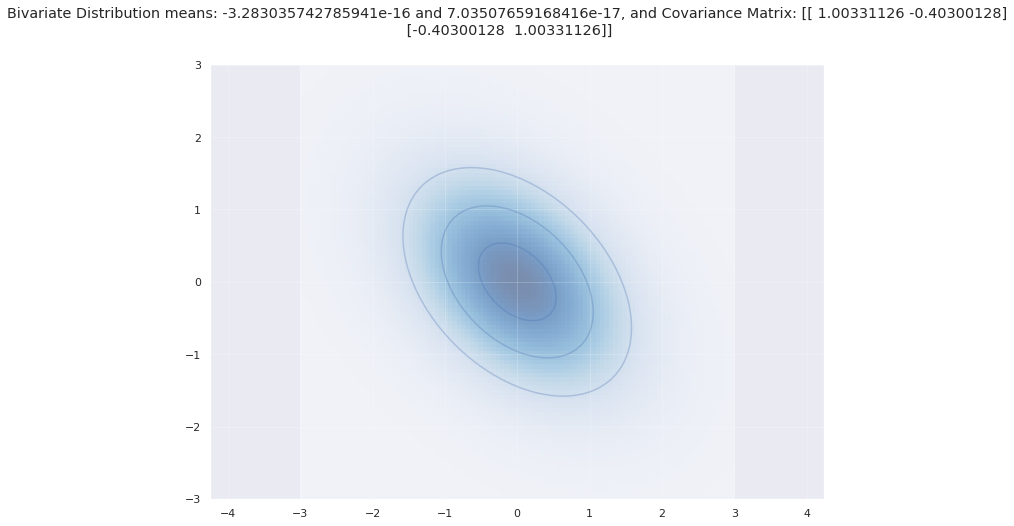

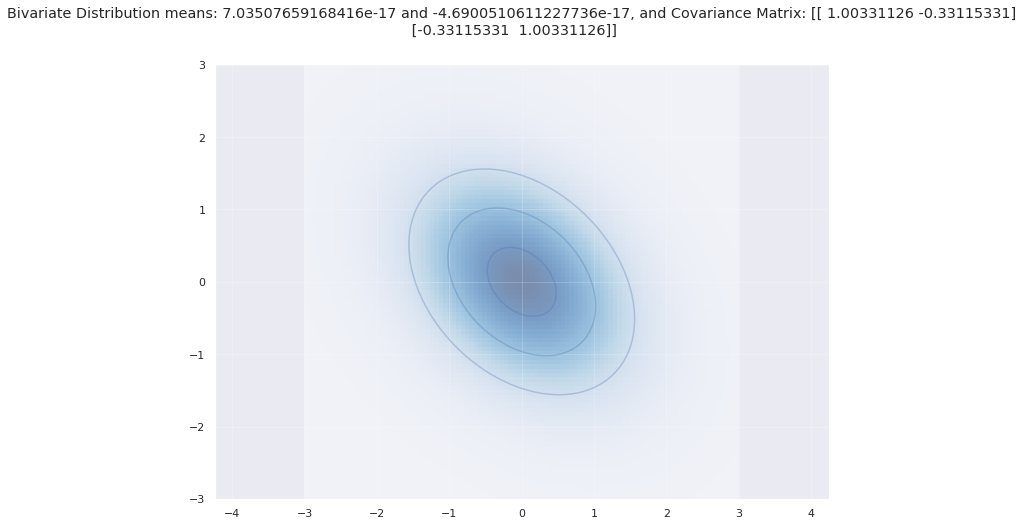

In [ ]:
#top 2 most correlated pairs
index = -1
#set how many relevant feature pairs one has.
significant = 2

for i in range(significant):
    triple = max_triple_array_sorted[index]
    #normalize pairs
    x1 = np.array(df[non_categorical_cols[int(triple[0])]])
    x1_n = (x1 - x1.mean()) / (x1.std())
    x2 = np.array(df[non_categorical_cols[int(triple[1])]])
    x2_n = (x2 - x2.mean()) / x2.std()
    means = np.vstack([x1_n.mean(), x2_n.mean()]).flatten()
    cov = np.cov(np.vstack([x1_n,x2_n]))
    plot_2d_Gaussian_pdf(means, cov)
    index = index - 1

#### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?


##### Males and Females:

In [ ]:
#split into sperate groups
groups = heart_df.groupby(by='sex')

males = groups.get_group(1)
females = groups.get_group(0)
males.head(10)

#drop gender as it is non numerical.
male_corr = males.drop(columns=['target','sex']).corr()
female_corr = females.drop(columns=['target','sex']).corr()

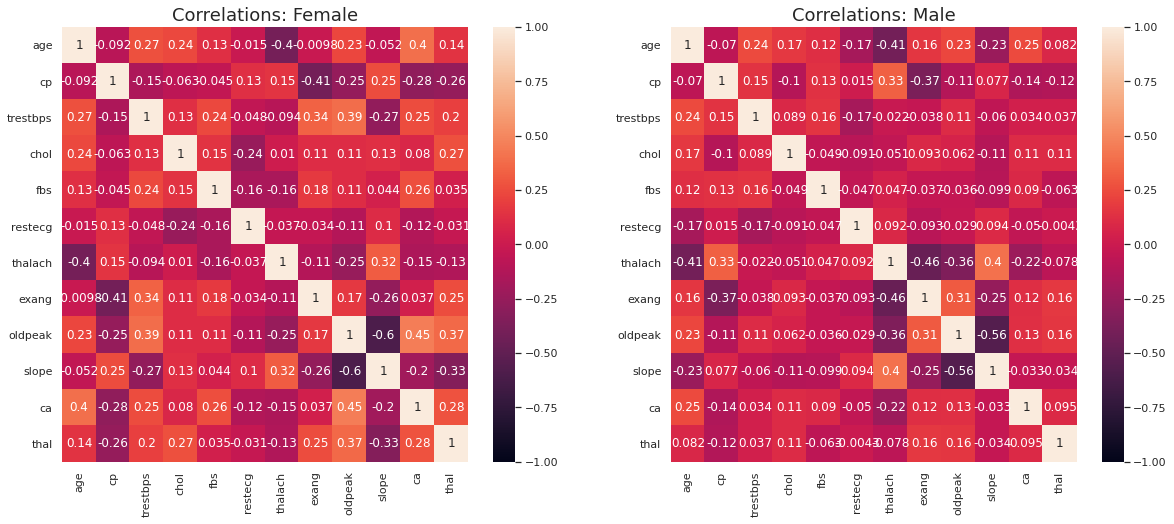

In [ ]:
# Plot correlation matrices
fig, axes = plt.subplots(ncols=2, figsize=(20,8))

sns.heatmap(female_corr, vmin=-1, vmax=1, annot=True, ax=axes[0])
axes[0].set_title('Correlations: Female', fontsize=18)

sns.heatmap(male_corr, vmin=-1, vmax=1, annot=True, ax=axes[1])
axes[1].set_title('Correlations: Male', fontsize=18);

In [ ]:
#define significant
upper_corr = 0.45
lower_corr = 0.15

new_features = males.drop(columns=['sex', 'target']).columns
np_male_corrs = male_corr.values
np_female_corrs = female_corr.values

#finding extremely uncorelated features on both sides of spectrum
ind = np.argwhere(((np.abs(np_male_corrs) <= lower_corr) & np.abs(np_female_corrs >= upper_corr)) | ((np.abs(np_male_corrs) >= upper_corr) & np.abs(np_female_corrs <= lower_corr)))
sorted_ind = np.sort(ind, axis=1)
final_ind = np.unique(sorted_ind, axis=0)

filtered = []
for val in final_ind:
    f1 = new_features[val[0]]
    f2 = new_features[val[1]]
    
    filtered.append((f1, f2))
print(f"The values we are looking for are: {filtered[0]},{filtered[1]} and {filtered[2]}")

The values we are looking for are: ('thalach', 'exang'),('oldpeak', 'slope') and ('oldpeak', 'ca')


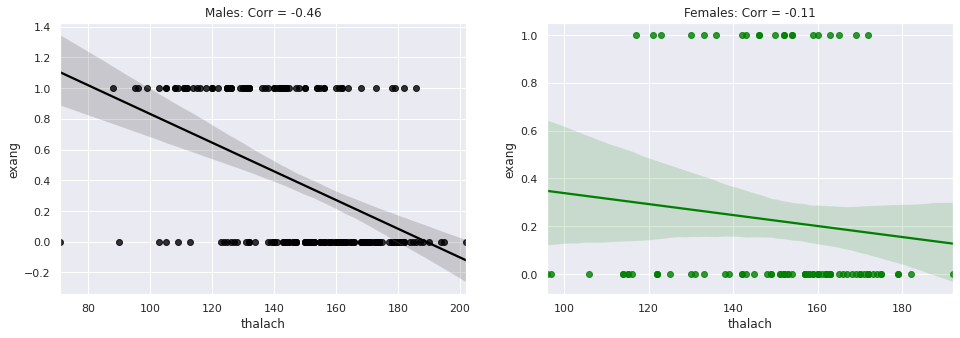

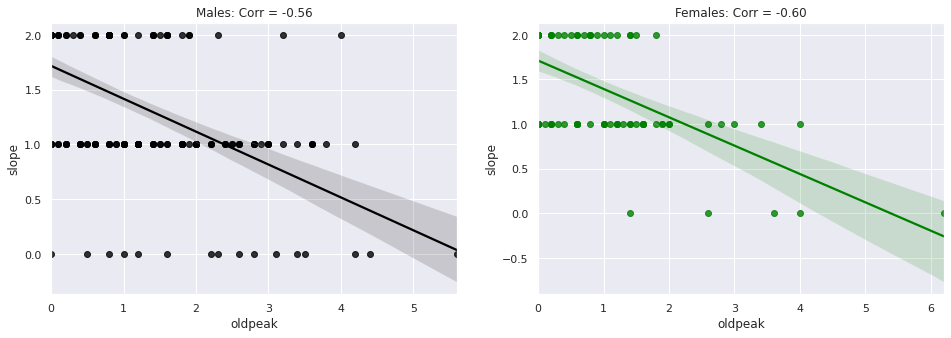

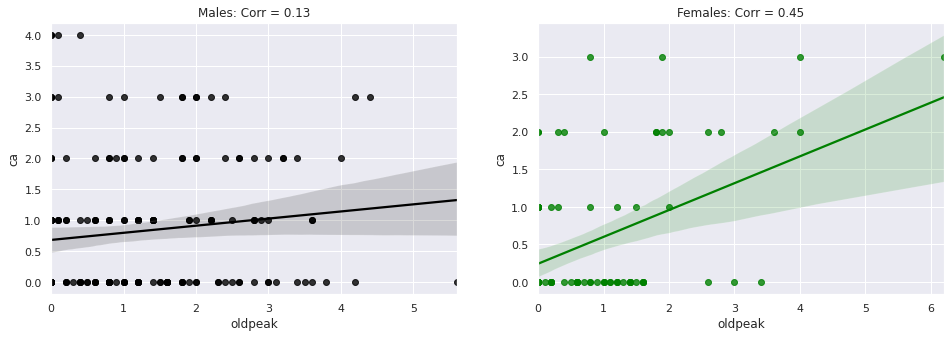

In [ ]:
#plotting the values we just found
for val in filtered:
    fig, axes = plt.subplots(ncols=2, figsize=(16,5))
    axes[0].set_title(f'Males: Corr = {male_corr.loc[val[0], val[1]]:.2f}')
    sns.regplot(val[0], val[1], data=males, ax=axes[0], color="black")
    axes[1].set_title(f'Females: Corr = {female_corr.loc[val[0], val[1]]:.2f}')
    sns.regplot(val[0], val[1], data=females, ax=axes[1], color="green")

##### Healthy vs Diseases

In [ ]:
#divide data into two groups (healthy vs diseased)
groups = heart_df.drop(columns='sex').groupby(by='target')
diseased = groups.get_group(1)
healthy = groups.get_group(0)

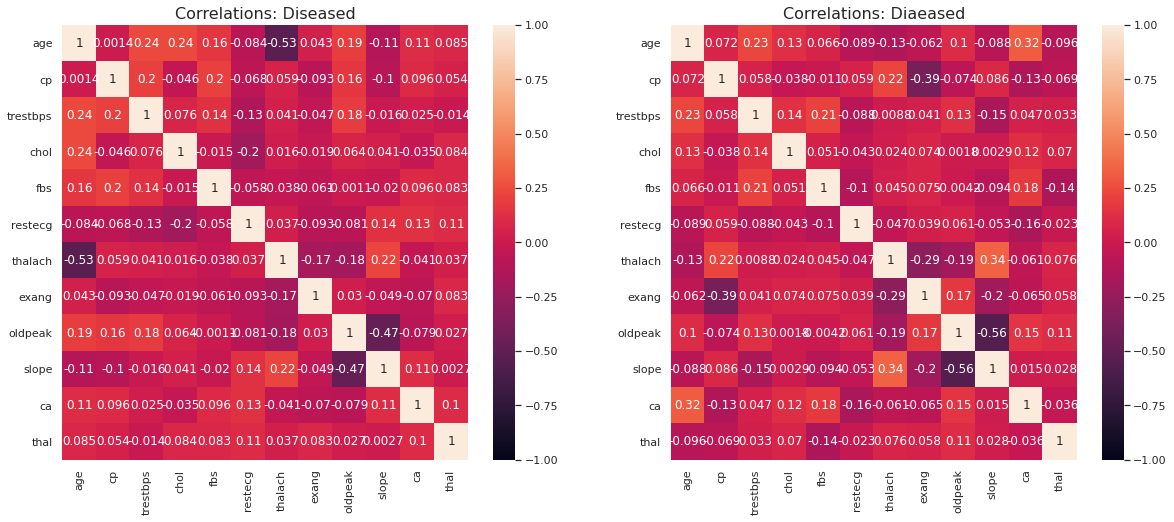

In [ ]:
diseased_corr = diseased.drop(columns='target').corr()
healthy_corr = healthy.drop(columns='target').corr()
fig, axes = plt.subplots(ncols=2, figsize=(20,8))

sns.heatmap(diseased_corr, vmin=-1, vmax=1, annot=True, ax=axes[0])
axes[0].set_title('Correlations: Diseased', fontsize=16)

sns.heatmap(healthy_corr, vmin=-1, vmax=1, annot=True, ax=axes[1])
axes[1].set_title('Correlations: Diaeased', fontsize=16);

In [ ]:
#define significant
upper_corr = 0.5
lower_corr = 0.2

features = diseased.drop(columns=['target']).columns

np_diseased_corrs = diseased_corr.values
np_healthy_corrs = healthy_corr.values

ind = np.argwhere(((np.abs(np_diseased_corrs) <= lower_corr) & np.abs(np_healthy_corrs >= upper_corr)) | ((np.abs(np_diseased_corrs) >= upper_corr) & np.abs(np_healthy_corrs <= lower_corr)))
sorted_ind = np.sort(ind, axis=1)
sorted_ind
final_ind = np.unique(sorted_ind, axis=0)

filtered = []
for val in final_ind:
    f1 = new_features[val[0]]
    f2 = new_features[val[1]]
    
    filtered.append((f1, f2))
print(len(filtered))
print(f"The values we are looking for are: {filtered[0]}")

1
The values we are looking for are: ('age', 'thalach')


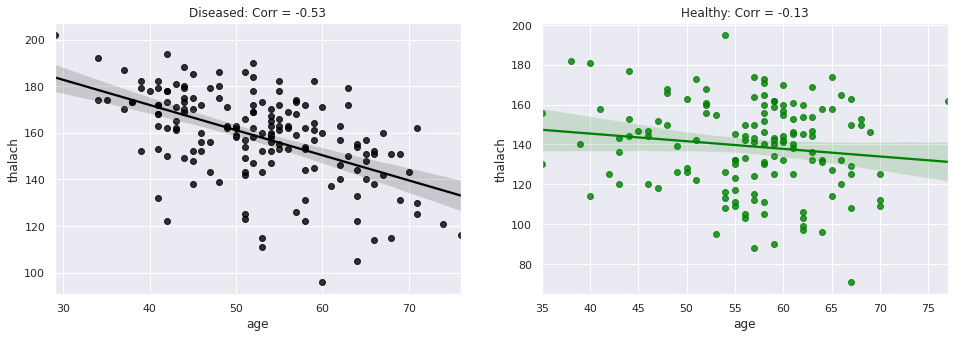

In [ ]:
for val in filtered:
    fig, axes = plt.subplots(ncols=2, figsize=(16,5))
    axes[0].set_title(f'Diseased: Corr = {diseased_corr.loc[val[0], val[1]]:.2f}')
    sns.regplot(val[0], val[1], data=diseased, ax=axes[0], color="black")
    axes[1].set_title(f'Healthy: Corr = {healthy_corr.loc[val[0], val[1]]:.2f}')
    sns.regplot(val[0], val[1], data=healthy, ax=axes[1], color="green")

For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

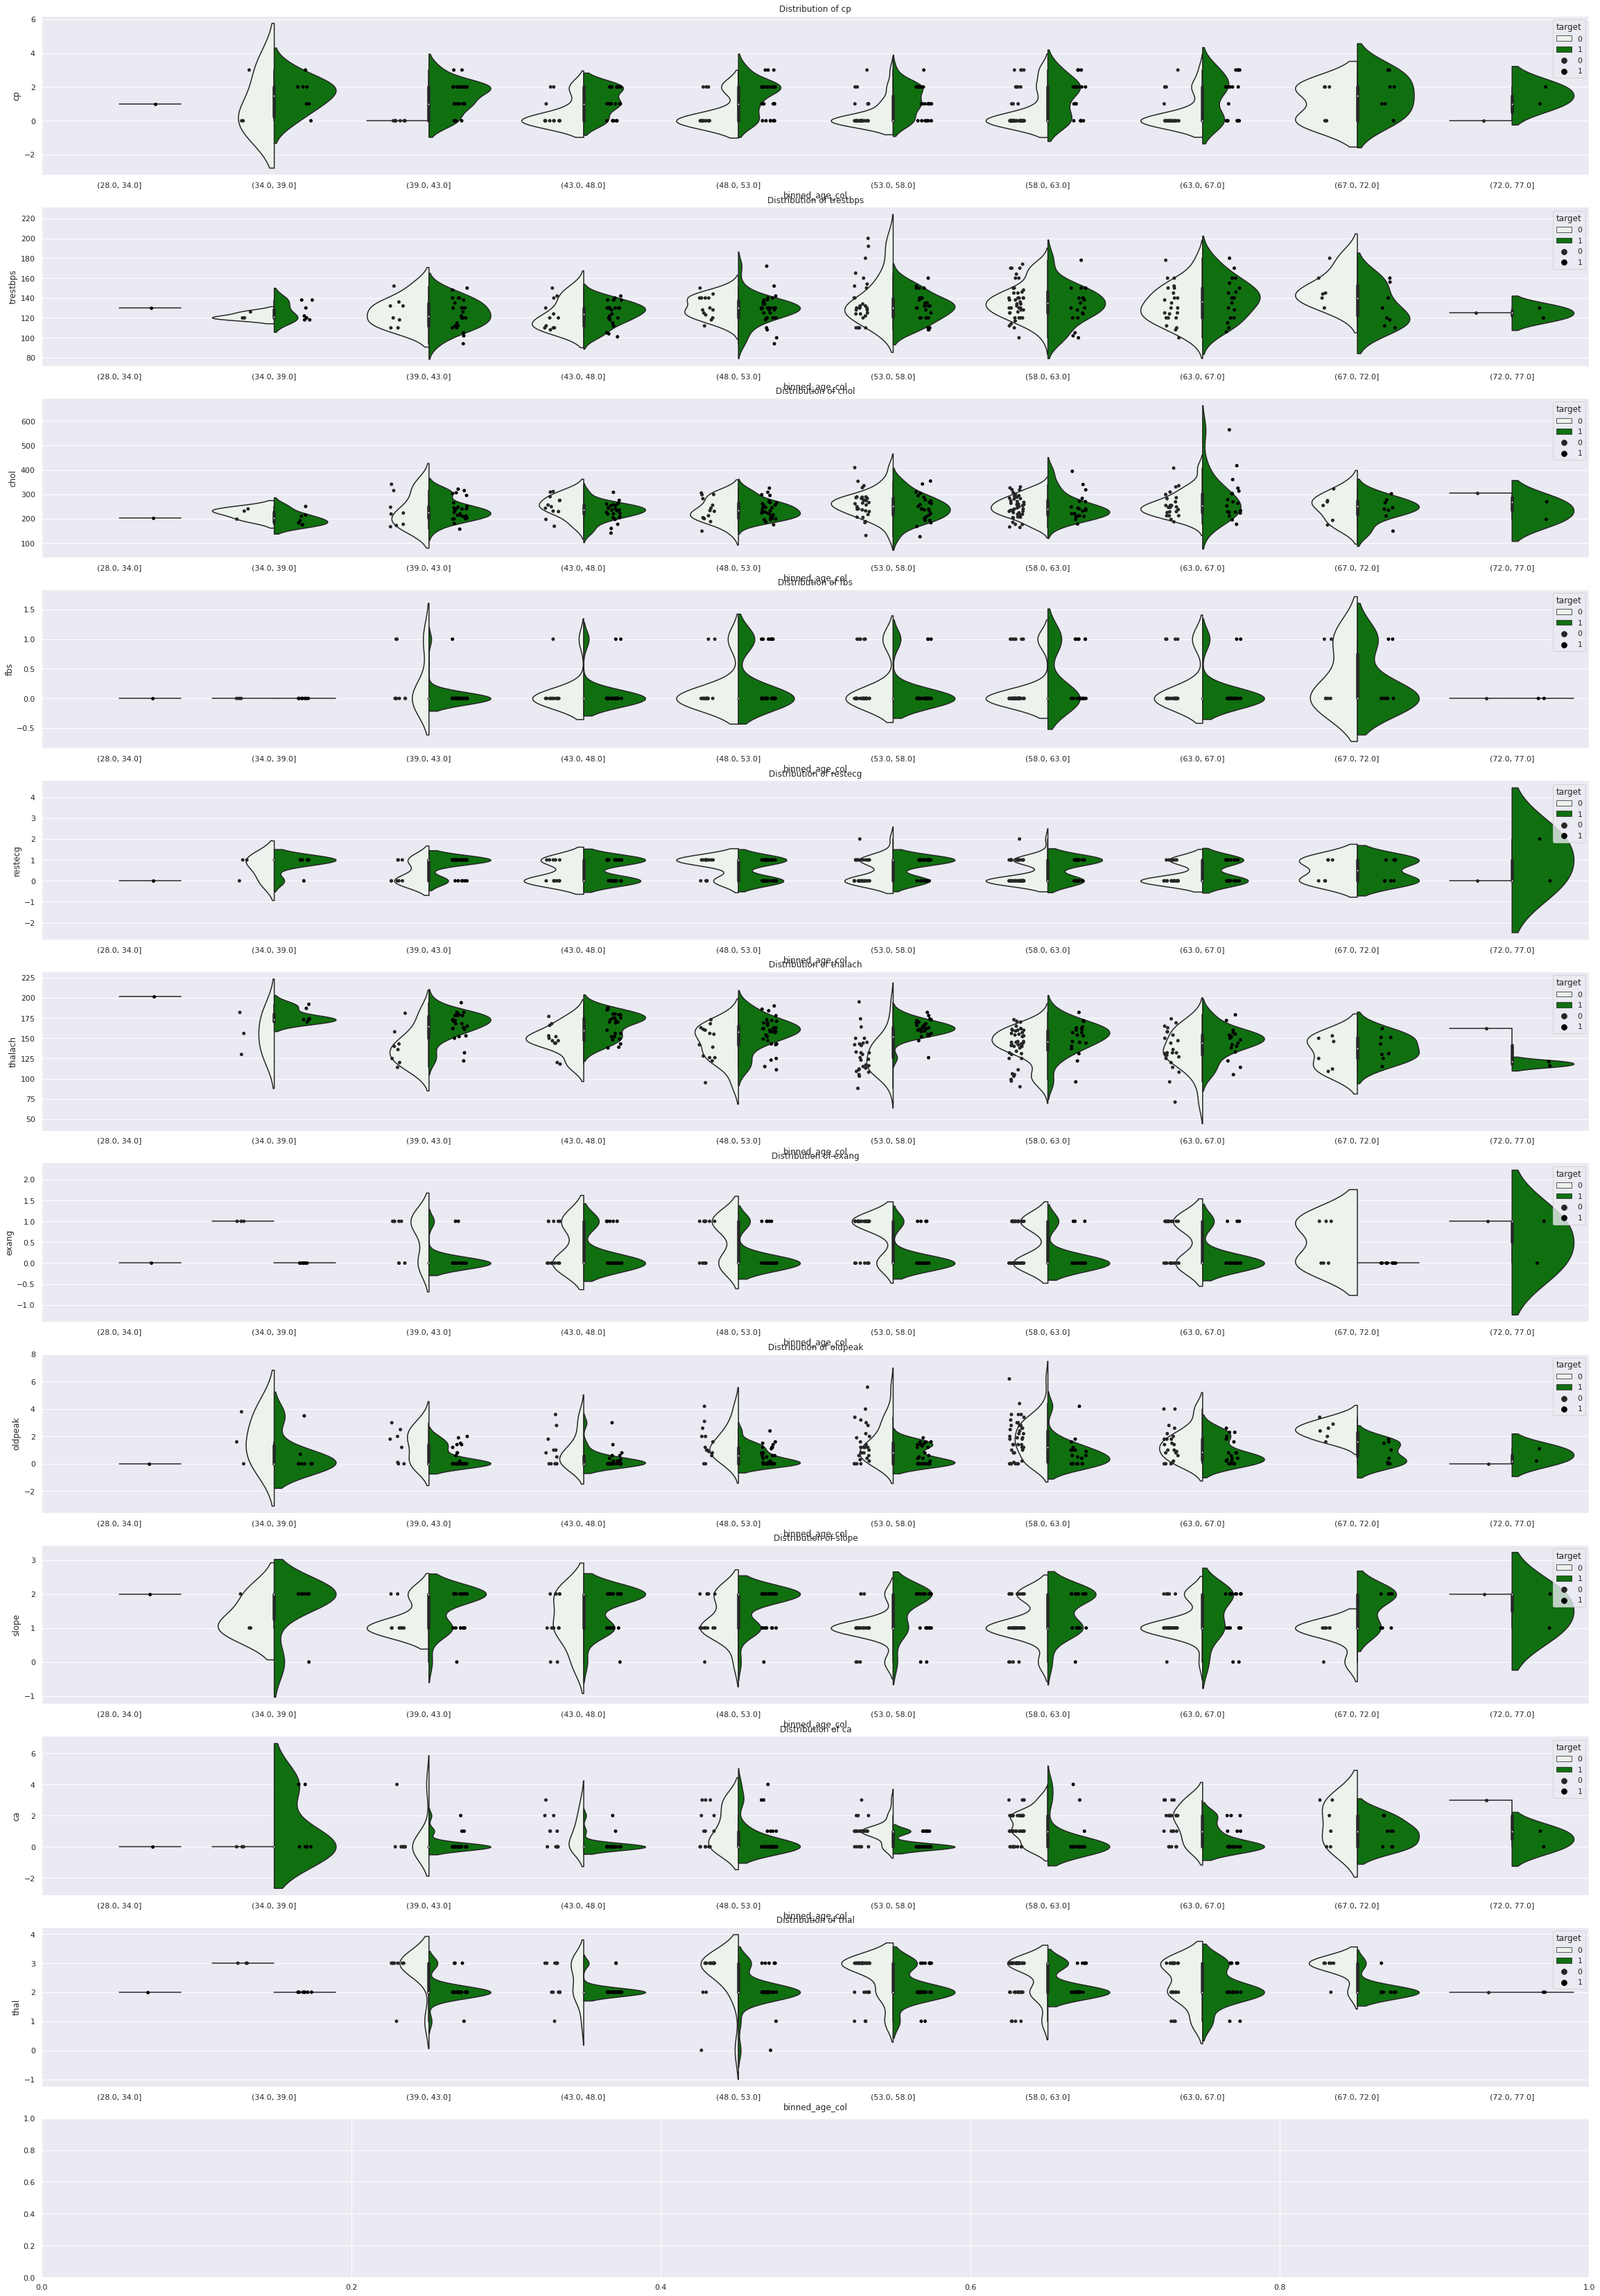

In [ ]:
#seperate into bins
binned_age_col = pd.cut(heart_df['age'], bins=10, precision=0, include_lowest=True)
binned_age_col.name = 'binned_age_col'
df_new = pd.concat((binned_age_col, heart_df), axis=1)

fig, axes = plt.subplots(12,1 ,figsize=(40, 60))

feautres = df_new.drop(columns=['sex', 'age', 'binned_age_col', 'target']).columns
i = 0

for feat in feautres:
    sns.violinplot(x='binned_age_col', y=feat, hue='target', split=True, data=df_new, ax=axes[i], color="green")
    sns.stripplot(x='binned_age_col', y=feat, hue='target', split=True, data=df_new, ax=axes[i], color="black")
    axes[i].set_title(f'Distribution of {feat}', )
    i = i+1

#### Suggest, state and address at least one original question:

Our question would be: Is there any relationship between the interquartile range of age paired with Gender?

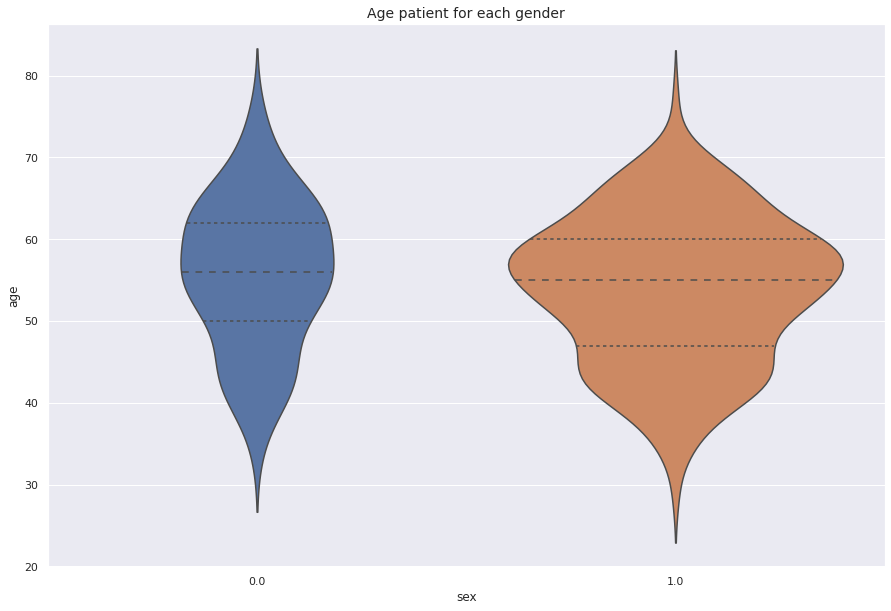

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Age patient for each gender', fontsize=14)
ax = sns.violinplot(x='sex', y='age', data=heart_df,split=True, scale="count", inner="quartile")

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

The standard normal distribution is not heavy right tailed. We will use the definiton of Heavy Tailed distribution to prove this:<br><br>

$$\lim_{x\to\infty} e^{tx}P(X>x)$$
$$=\lim_{x\to\infty} e^{tx}\cdot\int_{x}^{\inf} \frac {1}{\sqrt{2\pi}} \cdot e^{-\frac{u^2}{2}}du $$
$$=\lim_{x\to\infty} e^{tx}\cdot (\frac{1}{2}-\frac{1}{2}\text{erf}\left(\frac{x}{\sqrt{2}}\right)) *= 0 $$
<br>
(*) We use L'Hopitals rule, where we get that $ \lim_{x\to\infty}(\frac{1}{2}-\frac{1}{2}\text{erf}\left(\frac{x}{\sqrt{2}}\right)) = 0$
<br><br>
Therefore, as we can see $\exists t > 0$ for which $$\lim_{x\to\infty} e^{tx}P(X>x)\neq \infty $$ and we conclude that the standard normal distribution is not heavy right tailed


https://www.wolframalpha.com/input/?i=+lim+from+x+to+inf+of+%28e%5Ex%29+%281%2F2-1%2F%282erf%28x%2Fsqrt%282%29%29%29%29 

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

The log-normal distribution is heavy right tailed. We will use the definiton of Heavy Tailed distribution to prove this:<br><br>

$$\lim_{x\to\infty} e^{tx}P(X>x)$$
$$=\lim_{x\to\infty} e^{tx}\cdot\int_{x}^{\inf} \frac {1}{\sqrt{2\pi}} \cdot e^{-\frac{ln(u)^2}{2}} \cdot \frac{1}{u}du $$
$$=\lim_{x\to\infty} e^{tx}\cdot \frac{1}{\sqrt{2}\sqrt{\pi }x} $$
$$=\frac{1}{\sqrt{2}\sqrt{\pi }}\cdot \lim _{x\to \infty \:}\left(\frac{e^{xt}}{x}\right)$$
$$(*) =\frac{1}{\sqrt{2}\sqrt{\pi }}\cdot \lim _{x\to \infty \:}\left(\frac{e^{xt}t}{1}\right) = \infty$$
<br>
(*) We use L'Hopitals rule, where we get that $ \lim _{x\to \infty \:}\left(\frac{e^{xt}}{x}\right) = \lim _{x\to \infty \:}\left(\frac{e^{xt}t}{1}\right)$
<br><br>
Therefore, as we can see $\forall t > 0$ for which $$\lim_{x\to\infty} e^{tx}P(X>x)=\infty $$ and we conclude that the log-normal distribution is heavy right tailed

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?


By using Markov Chains, we get that for any result we have the same almost the same probabilities thus, it is almost uniformally distributed. <b>(Look at figure 1)</b>
We can also see this  distribution converges to an uniformal by the law of number rolling. <b>(Look at figure 2)</b><br>
Therefore, our expectation is that that the average will be the average of uniformal distribution which is  $\frac{a+b}{2} = \frac{1+6}{2} = 3.5$

In [ ]:
mat = np.array([[0.4,0.2,0.1,0,0.1,0.2],
                [0.2,0.4,0.2,0.1,0,0.1],
                [0.1,0.2,0.4,0.2,0.1,0],
                [0,0.1,0.2,0.4,0.2,0.1],
                [0.1,0,0.1,0.2,0.4,0.2],
                [0.2,0.1,0,0.1,0.2,0.4]])

In [ ]:
# Figure 1
np.linalg.matrix_power(mat,4)

array([[0.1878, 0.1768, 0.1565, 0.1456, 0.1565, 0.1768],
       [0.1768, 0.1878, 0.1768, 0.1565, 0.1456, 0.1565],
       [0.1565, 0.1768, 0.1878, 0.1768, 0.1565, 0.1456],
       [0.1456, 0.1565, 0.1768, 0.1878, 0.1768, 0.1565],
       [0.1565, 0.1456, 0.1565, 0.1768, 0.1878, 0.1768],
       [0.1768, 0.1565, 0.1456, 0.1565, 0.1768, 0.1878]])

In [ ]:
# Figure 2
np.linalg.matrix_power(mat,29)

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.


In [ ]:
traj_1 = [];
for i in range(1000):
  draws = []
  num = np.random.randint(1,7) 
  for i in range(29):
    distribution = mat[num - 1]
    num = np.random.choice(a=[1,2,3,4,5,6],p=distribution)
    draws.append(num)
  traj_1.append(sum(draws)/30)

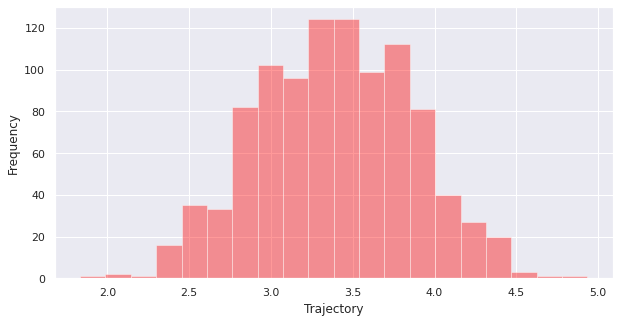

In [ ]:
#plot the histogram
sns.distplot(traj_1, bins=20, kde=False, color="red")
plt.xlabel("Trajectory")
plt.ylabel("Frequency")
plt.show()

3. What does the distribution look like? What are the empirical mean and the std?

By examining the histogram above, it seems like the distribution of the Markov Chains is normally distributed with a mean of ~3.5.

In [ ]:
mu1 = np.mean(traj_1)
std1 = np.std(traj_1)
print(f"Empirical Mean value = {mu1}")
print(f"Empirical Std value = {std1}")

Empirical Mean value = 3.3907
Empirical Std value = 0.47442030006220337


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?


Similarly, our expectation is that that the average will be the average of uniformal distribution which is  $\frac{a+b}{2} = \frac{1+6}{2} = 3.5$

2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.


In [ ]:
traj_2 = [];
for i in range(1000):
  draws = []
  num = np.random.randint(1,7) 
  for i in range(499):
    distribution = mat[num - 1]
    num = np.random.choice(a=[1,2,3,4,5,6],p=distribution)
    draws.append(num)
  traj_2.append(sum(draws)/500)
  

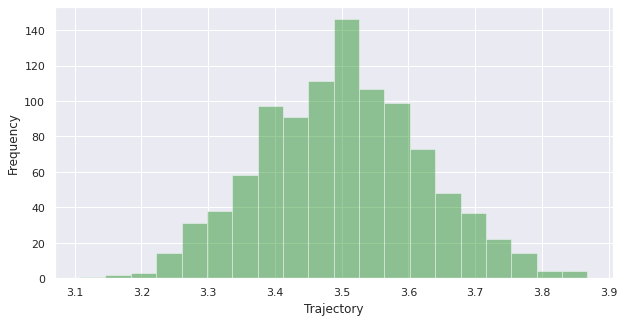

In [ ]:
#plot the histogram
sns.distplot(traj_2, bins=20, kde=False, color="green")
plt.xlabel("Trajectory")
plt.ylabel("Frequency")
plt.show()

3. What does the distribution look like? What are the empirical mean and the std?

By examining the histogram above, it seems like the distribution of the Markov Chains is normally distributed with a mean of 3.5.

In [ ]:
mu2 = np.mean(traj_2)
std2 = np.std(traj_2)
print(f"Empirical Mean value = {mu2}")
print(f"Empirical Std value = {std2}")

Empirical Mean value = 3.500812
Empirical Std value = 0.12192452032302609


#### 4.C
Draw normal fit curves on your two histograms.

In [ ]:
def plot_normal_fit(av_arr, mu, std):
    x = np.linspace(np.min(av_arr), np.max(av_arr), 1000)
    y = stats.norm.pdf(x, loc=mu, scale=std)
    sns.distplot(av_arr, bins=20, kde=False, norm_hist=True, color='green')
    plt.plot(x, y, color="r")
    plt.xlabel("Trajectory")
    plt.ylabel("Frequency")
    plt.show()

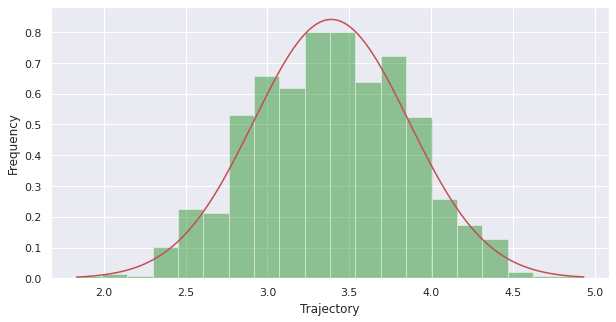

In [ ]:
plot_normal_fit(traj_1, mu1, std1)

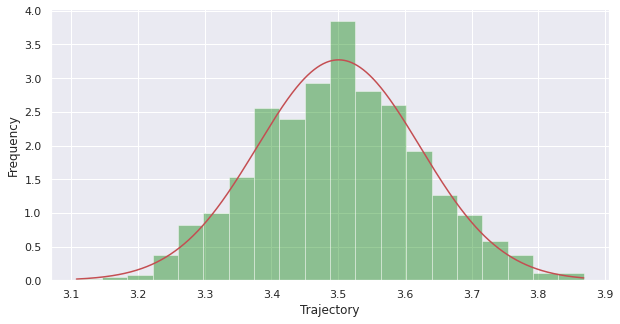

In [ ]:
plot_normal_fit(traj_2, mu2, std2)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [ ]:
vac = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

In [ ]:
def cov_i_i1(i):
  dice = np.array([1,2,3,4,5,6]);
  prob_i = vac.dot(np.linalg.matrix_power(mat,i))
  if(i == 0):
    prob_i = vac
  prob_i_1 = vac.dot(np.linalg.matrix_power(mat,i + 1))

  E_X = 0
  E_Y = 0
  for i in range(6):
    E_X += dice[i] * prob_i[i]
    E_Y += dice[i] * prob_i_1[i]
  cov = 0
  for i in range(6):
    cov += ((dice[i] - E_X) * (dice[i] - E_Y))
  cov /= 6

  return cov

In [ ]:
cov_i_i1(500)

2.9166666666666665

We are not suprised by the result above. Since $X_0 = X_1 = ....= X_{500} $ are all uniformally distributed, then $Cov(X_i,X_j)$ for i,j = 1,..,500 we have $Cov(X,X)$ which is $var(X) = 2.91666$

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

##### 1.
We have seen above that every $X_0 = X_1 = ....= X_{500} $ therefore it is clear that $E(\bar{X_n}) =E(X_0)$

##### 2.
As seen in 4.D we have learnt that $Cov(X_0, X_d) = V(X_O)$ therefore:
$$\frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)V(X_O)$$
<br>
$$= \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\cdot V(X_O)\sum_{d=1}^{n-1}(n-d)$$
<br>
$$= \frac{1}{n}\sigma_0^2 +  \frac{2}{n^2}\cdot V(X_O)\frac{n(n-1)}{2}$$
<br>
$$= \frac{1}{n}\sigma_0^2 + \frac{V(X_O)(n-1)}{n}$$
<br>
$$= \frac{1}{n}V(X_O) + \frac{V(X_O)(n-1)}{n}$$
<br>
$$=V(\bar{X_O}) $$

##### 3.
Seeing as we have claculated $E(\bar{X_n})$ and $V(\bar{X_O})$. Then we can conclude that the cental limit theorem for Markov Chains is

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [ ]:
num_of_samples = 10_000000
samples = stats.multivariate_normal(mean = np.array([0,0]), cov=np.array([[2,3],[3,5]])).rvs(num_of_samples)

In [ ]:
import time
start_time = time.time()
x = samples[:,0]
y = samples[:,1]
kendal = stats.kendalltau(x,y)[0]
print(kendal)
print("Time: %.3f seconds" % (time.time() - start_time))

0.7952070284329829
Time: 7.122 seconds


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [ ]:
def sample_from_data(samples, num_of_samples):
  x = samples[:,0]
  y = samples[:,1]
  idx = np.arange(1,len(samples))
  selected_idx = np.random.choice(a=idx, size=num_of_samples)
  x_new = np.take(a=x,indices=selected_idx)
  y_new = np.take(a=y,indices=selected_idx)
  return stats.kendalltau(x_new,y_new)[0]

In [ ]:
print(sample_from_data(samples, 1000))

0.7911871871871872


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [ ]:
list_of_kendall = [sample_from_data(samples, 1000) for i in range(1000)]

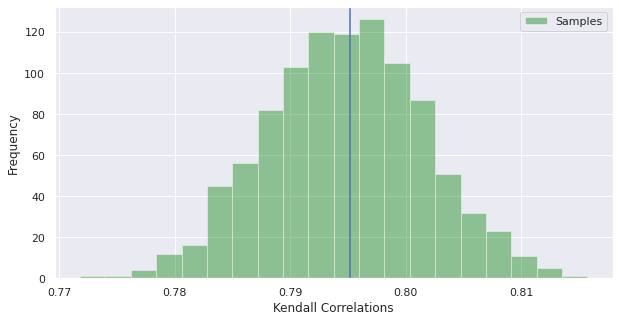

In [ ]:
graph = sns.distplot(list_of_kendall, bins=20, kde=False, color="green", label="Samples")
graph.axvline(kendal)
plt.xlabel("Kendall Correlations")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
mu1 = np.mean(list_of_kendall)
std1 = np.std(list_of_kendall)
print(f"Empirical Mean value = {mu1}")
print(f"Empirical Std value = {std1}")

Empirical Mean value = 0.7948103208794192
Empirical Std value = 0.006796802206371693


#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

the naive complexity of each calculation is O(N^2)
 

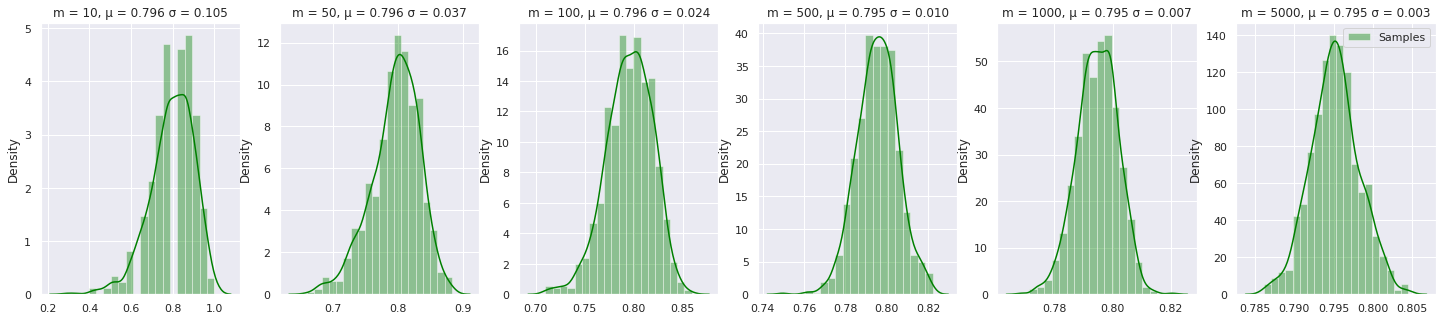

In [ ]:
m_arr = [10,50,100,500,1000,5000]
mean_arr = []
time_arr = []
fig, axes = plt.subplots(1,6, figsize=(25,5))
for i,m in enumerate(m_arr):
    start_time = time.time()
    list_of_kendall = [sample_from_data(samples, m) for i in range(1000)]
    mean_arr.append(np.mean(np.array(list_of_kendall)))
    std = np.std(list_of_kendall)
    sns.distplot(list_of_kendall, bins=20,ax=axes[i], kde=True, color="green", label="Samples")
    #print(f"m = {m}," + " μ = %.3f"%mean_arr[i] + " σ = %.3f"%std)
    axes[i].set_title(f"m = {m}," + " μ = %.3f"%mean_arr[i] + " σ = %.3f"%std)
    time_arr.append((time.time() - start_time))
plt.legend()
plt.show()

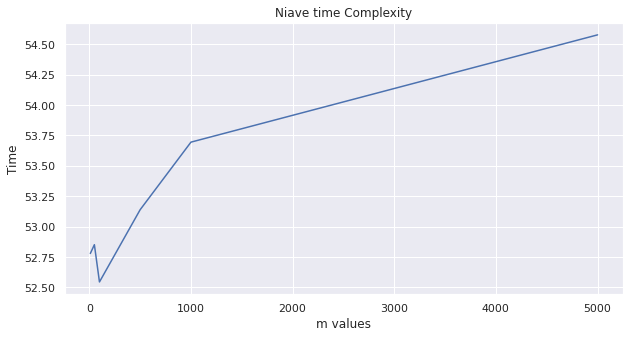

In [ ]:
sns.lineplot(m_arr,time_arr)
plt.xlabel("m values")
plt.ylabel("Time")
plt.title("Niave time Complexity")
plt.show()

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [ ]:
Kendall_data_df = pd.read_csv('Kendall_data.csv', names=['x', 'y'])
Kendall_data_df.head(5)

,x,y
0,-2.07,-2.83
1,2.12,3.46
2,-0.61,-1.54
3,-0.40,-0.57
4,0.05,-0.05


In [ ]:
x_kendal = np.array(Kendall_data_df['x'])
y_kendal = np.array(Kendall_data_df['y'])

We denote the $Null \space Hypothesis$ as follows:<br><br>
$H_0:$ Both the old dataset (Kendall_data.csv) and the data generated in Section 5.a do not originate from the same population.

In [ ]:
p = mean_arr[2]
p_hat = tau = stats.kendalltau(x,y)[0]
n = x_kendal.shape[0]
z = 1.96
print("P =",p,"P_hat =",p_hat,"n =",n,"z =",z)

P = 0.7955628282828284 P_hat = 0.7952070284329829 n = 100 z = 1.96


In [ ]:
confi_interval = (p_hat-z*(np.sqrt(p*(1-p))/np.sqrt(n)) , p_hat+z*(np.sqrt(p*(1-p))/np.sqrt(n)))
print("")
print(f"The mean Kendall result for the 5.A data is:           {p_hat}")
print(f"The mean Kendall result for the kendall_data.csv is:   {p}")
print(f"95% Confidence Interval:                              {confi_interval}")


The mean Kendall result for the 5.A data is:           0.7952070284329829
The mean Kendall result for the kendall_data.csv is:   0.7955628282828284
95% Confidence Interval:                              (0.7497969836010235, 0.8406170732649422)


In [ ]:
mean_diff = p-p_hat
SE = (confi_interval[1] - confi_interval[0])/(2*1.96)
z = mean_diff/SE
SE, mean_diff, z

(0.023168390220387407, 0.0003557998498455728, 0.015357124360434885)

In [ ]:
p_val = np.exp((-0.717)*z - 0.416*(z**2))
p_val

0.9889523108035829

We have a $p_{val} = 0.98$ that the true value lies within the confidence interval calculated.<br>We can therefore with 95% confidence reject the null hypothesis which says that the generated data and the kendall_data.csv do not originate from the same population.

<b> End of Assingment </b>